In [29]:
# AutoML Module
from tpot import TPOTClassifier

# Normal Modules
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [30]:

from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
sonar_data = read_csv(url, header=None)
# split into input and output elements
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [31]:
sonar_data.shape

(208, 61)

In [32]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<h4> M >> Mine </h4>

<h4> R >> Rock </h4>

# Split Data

In [103]:
data = sonar_data.values
X, y = data[:, :-1], data[:, -1]

In [104]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1, shuffle=True)

print(X_train.shape, X_test.shape)

(187, 60) (21, 60)


### Simple Model

In [158]:
# model = LogisticRegression(fit_intercept=False, C = 120, max_iter = 500) # normaly penalty is l2 and solver is lbfgs
# c used to remove regularization from the model and increase the no of iteration to allow the solver to converge 
# but it may lead to overfitting

logreg = LogisticRegression(fit_intercept=False, max_iter = 100) 

logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

### Model Evaluation

In [159]:
# accuracy
X_train_pred = logreg.predict(X_train)
train_acc = accuracy_score(X_train_pred, y_train)
train_acc

X_test_pred = logreg.predict(X_test)
test_acc = accuracy_score(X_test_pred, y_test)

train_acc, test_acc

(0.8074866310160428, 0.7142857142857143)

In [160]:
# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print('AUC score: {:.3f}'.format(logreg_auc_score))

AUC score: 0.809


In [161]:
print('trining_score:', logreg.score(X_train, y_train))
print('testing_score:', logreg.score(X_test, y_test))
print('model_coeff', logreg.coef_)
print('model_intercept', logreg.intercept_)

trining_score: 0.8074866310160428
testing_score: 0.7142857142857143
model_coeff [[-0.18477065 -0.17735897 -0.12414734 -0.34687265 -0.32160368 -0.10267136
   0.15773228  0.08280722 -0.83048061 -0.99379987 -1.43103333 -1.28165257
  -0.59347368  0.08776324  0.36398834  0.69990954  0.54341552  0.57240267
  -0.19766315 -0.44717482 -0.41293336 -0.39845543 -0.30086915 -0.17640705
   0.5450131   0.400186    0.16393034 -0.0781829  -0.023107   -0.16944715
   0.99513115 -0.08008811  0.11646255  0.33343346  0.62410494  1.38007591
   0.88505727 -0.04902385 -0.16091209  0.64284851  0.20600718 -0.45365774
  -0.78912548 -1.06951757 -1.67231529 -1.29396018 -0.68199683 -0.70461101
  -0.48828669 -0.00823192 -0.10321843 -0.08105395 -0.01897949 -0.05450684
   0.00351349 -0.02722052  0.00915529 -0.0504279  -0.04447302 -0.01196442]]
model_intercept [0.]


In [171]:
# Print the number of errors
num_err = np.sum(y_test != logreg.predict(X_test))
print("Number of errors:", num_err)

Number of errors: 6


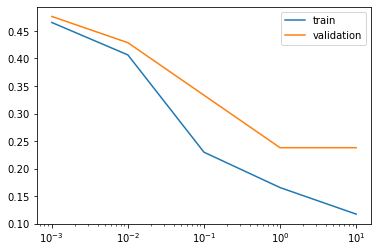

In [177]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10]
# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

# AutoML TPOT

In [35]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [115]:
# Define Model
model = TPOTClassifier(
    generations = 5, population_size = 50, 
    cv = cv, scoring = 'accuracy', 
    verbosity = 2, random_state = 1, 
    n_jobs = -1, disable_update_check=True,
    config_dict='TPOT light')

In [62]:
model.fit(X, y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7785714285714287

Generation 2 - Current best internal CV score: 0.8061111111111113

Generation 3 - Current best internal CV score: 0.8061111111111113

Generation 4 - Current best internal CV score: 0.8126984126984129

Generation 5 - Current best internal CV score: 0.8126984126984129

Best pipeline: KNeighborsClassifier(MinMaxScaler(GaussianNB(input_matrix)), n_neighbors=2, p=2, weights=uniform)


TPOTClassifier(config_dict='TPOT light',
               cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               disable_update_check=True, generations=5, n_jobs=-1,
               population_size=50, random_state=1, scoring='accuracy',
               verbosity=2)

In [63]:
# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(model.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Best pipeline steps:
1. StackingEstimator(estimator=GaussianNB())
2. MinMaxScaler()
3. KNeighborsClassifier(n_neighbors=2)


In [64]:
# Save the top performing Model
model.export('tpot_sonar_best_model.py')

# Open this model

In [ ]:
# load model
%load tpot_sonar_best_model.py

In [ ]:
'''# %load tpot_sonar_best_model.py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=1)

# Average CV score on the training set was: 0.8126984126984129
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=2, p=2, weights="uniform")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
'''

# New Model

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.metrics import roc_auc_score

In [68]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv')
data=tpot_data.values

In [70]:
# Average CV score on the training set was: 0.8126984126984129
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=2, p=2, weights="uniform")
)

In [77]:
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1, shuffle=True)

In [96]:
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
results

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [97]:
# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, exported_pipeline.predict_proba(X_test)[:, 1])
print('AUC score: {:.2f}'.format(tpot_auc_score))

AUC score: 0.93


In [98]:
#score for tpot model
print(exported_pipeline.score(X_train, y_train))
print(exported_pipeline.score(X_test, y_test))

0.8978494623655914
0.8095238095238095


In [152]:
# Print the number of errors
num_err = np.sum(y_test != exported_pipeline.predict(X_test))
print("Number of errors:", num_err)

Number of errors: 4


# Model Evaluation


In [100]:
# accuracy
X_train_pred = exported_pipeline.predict(X_train)
train_acc = accuracy_score(X_train_pred, y_train)
train_acc

X_test_pred = exported_pipeline.predict(X_test)
test_acc = accuracy_score(X_test_pred, y_test)

train_acc, test_acc

(0.8978494623655914, 0.8095238095238095)

# Make Predictive System

In [138]:
import random
input_data = []
for i in range(0,60):
    n = np.random.rand()
    input_data.append(n)
print(input_data)

[0.045996477477097564, 0.6135562844230434, 0.03433474483722909, 0.19568308074130092, 0.790505352619018, 0.27209992519604054, 0.5255658447332523, 0.5460939412528574, 0.5285574601125554, 0.15207028865117922, 0.6589133929638662, 0.49357312251078933, 0.6779646722243284, 0.025023795009490146, 0.5677632882791221, 0.08493147744738228, 0.7664965805828946, 0.4304799729695167, 0.4420565037605464, 0.9703998833364901, 0.13305249708058642, 0.3844508598845261, 0.05161894235221276, 0.8988058698078234, 0.45990432789260216, 0.6511178999173712, 0.5068468252054161, 0.4362666778287215, 0.14440798806725264, 0.14249454349195956, 0.5774989085923953, 0.02121783045433223, 0.7654874061968084, 0.18962270504214296, 0.9360169407188654, 0.3909091898491194, 0.8441814295172845, 0.16628488474270908, 0.45160099642066487, 0.36567956857244566, 0.224315014263879, 0.7206371066516349, 0.9698916492398109, 0.9031392071186825, 0.0875581431543444, 0.10367216565387238, 0.7272132603107813, 0.012719060455177233, 0.3950365782022643

In [139]:
input_data = np.array(input_data)

input_data.shape

(60,)

In [140]:
input_data = input_data.reshape(1, -1)

input_data.shape

(1, 60)

In [141]:
prediction = exported_pipeline.predict_proba(input_data)
prediction

array([[1., 0.]])